STUDENT PERFORMANCE INDICATOR 
## life cycle of ML Project
1.Understanding the problem statement
2.Data Collection
3.Data Checks to perform
4.EDA
5.Data pre-processing
6.Model Training
7.Choose Best Model

## Importing all the libraries that we need for ml project including warnings

In [77]:
import numpy as np 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import csv data as pandas dataframe

In [78]:
df = pd.read_csv("E:/mlproject/notebook/data/stud.csv")


In [79]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [80]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [81]:
df.shape

(1000, 8)

### DATA CHECKS TO PERFORM
### 1.Check Missing values
### 2.Check Duplicates
### 3.Check Data type
### 4.CHeck number of unique values in each column
### 5.Check statistics of dataset
### 6.Check various categories present in the different categorical cloumn

In [82]:
## 1
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### there are no missing values in dataset

In [83]:
## 2
df.duplicated().sum()

0

### there are no duplicates in the dataset

In [84]:
## 3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [85]:
## 4
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [86]:
## 5
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [87]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploring the Data

In [88]:
print(" Categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())

print(" Categories in 'race_ethnicity' variable:    ",end=" ")
print(df['race_ethnicity'].unique())

print(" Categories in 'parental level of education' variable:    ",end=" ")
print(df['parental_level_of_education'].unique())

print(" Categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print(" Categories in 'test_preparation_course' variable:    ",end=" ")
print(df['test_preparation_course'].unique())


 Categories in 'gender' variable:     ['female' 'male']
 Categories in 'race_ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
 Categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 Categories in 'lunch' variable:     ['standard' 'free/reduced']
 Categories in 'test_preparation_course' variable:     ['none' 'completed']


In [89]:
## define numerical and categorical columns
numeric=[feature for feature in df.columns if df[feature].dtype!='O']
category=[feature for feature in df.columns if df[feature].dtype=='O']

## print columns
print(' we have {} numerical columns:{}'.format(len(numeric),numeric))
print(' we have {} category columns:{}'.format(len(category),category))

 we have 3 numerical columns:['math_score', 'reading_score', 'writing_score']
 we have 5 category columns:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## adding columns for total score and average

In [90]:
df['total score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=(df['total score'])/3

In [91]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [92]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()


print(f'no of students with full score in reading_score:{reading_full}')
print(f'no of students with full score in writing_score:{writing_full}')
print(f'no of students with full score in math_score:{math_full}')

no of students with full score in reading_score:17
no of students with full score in writing_score:14
no of students with full score in math_score:7


In [93]:
reading_low=df[df['reading_score']<=20]['average'].count()
writing_low=df[df['writing_score']<=20]['average'].count()
math_low=df[df['math_score']<=20]['average'].count()

print(f'no of students with low score in reading_score:{reading_low}')
print(f'no of students with low score in writing_score:{writing_low}')
print(f'no of students with low score in math_score:{math_low}')

no of students with low score in reading_score:1
no of students with low score in writing_score:3
no of students with low score in math_score:4


### Visualization of Data

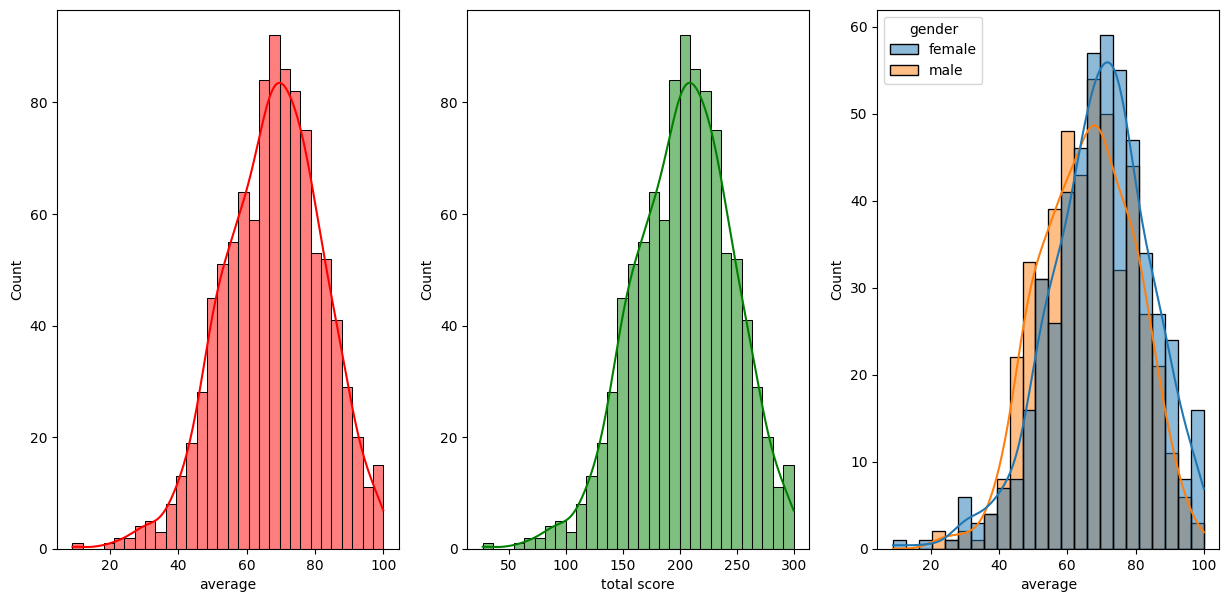

In [94]:
## Histogram and KDE
fig,axs=plt.subplots(1,3, figsize=(15,7))
##plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r',ax=axs[0])
##plt.subplot(122)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g',ax=axs[1])
##plt.subplot(123)
sns.histplot(data=df,x='average',kde=True,hue='gender',ax=axs[2])
plt.show()

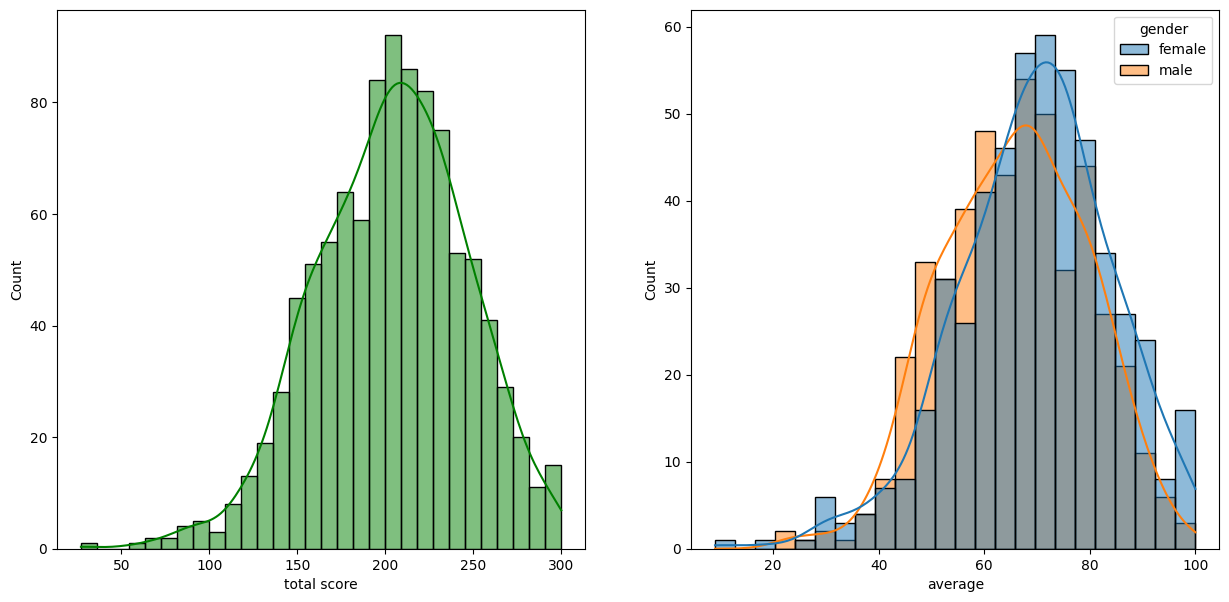

In [95]:
## Histogram and KDE
fig,axs=plt.subplots(1,3, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

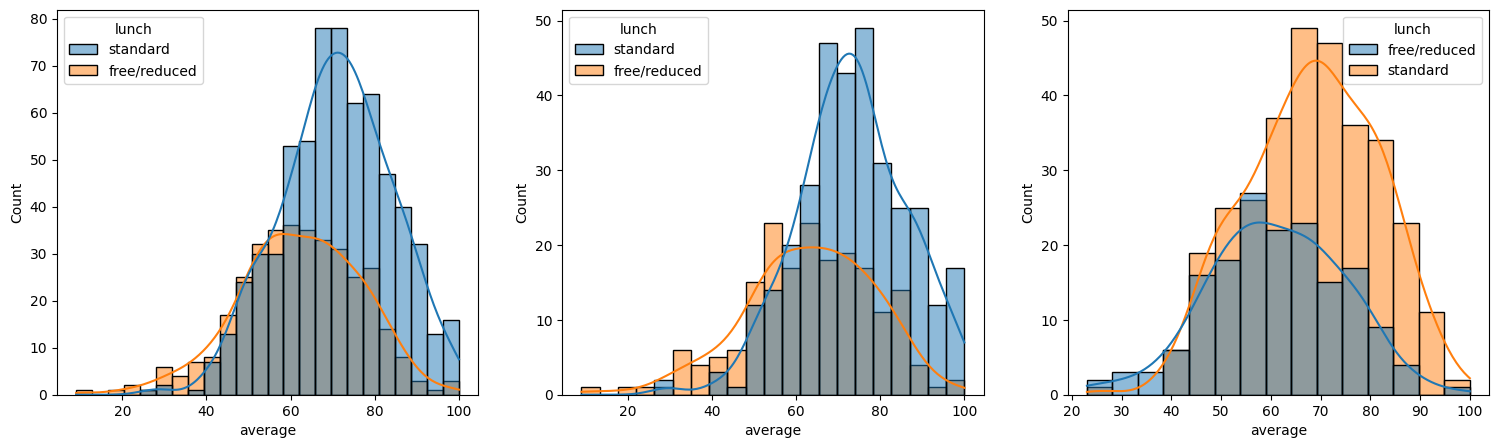

In [96]:
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [97]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


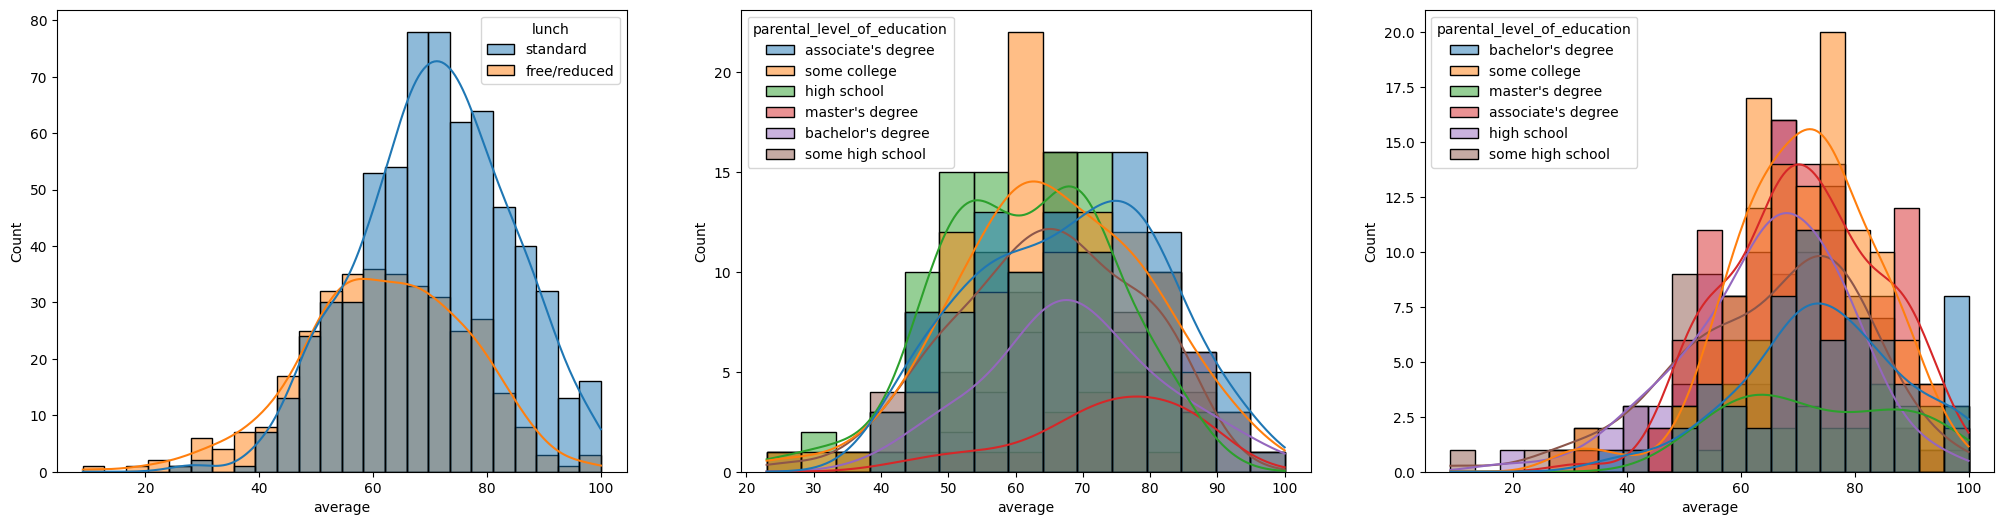

In [98]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
##plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch',ax=axs[0])
##plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education',ax=axs[1])
##plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education',ax=axs[2])
plt.show()

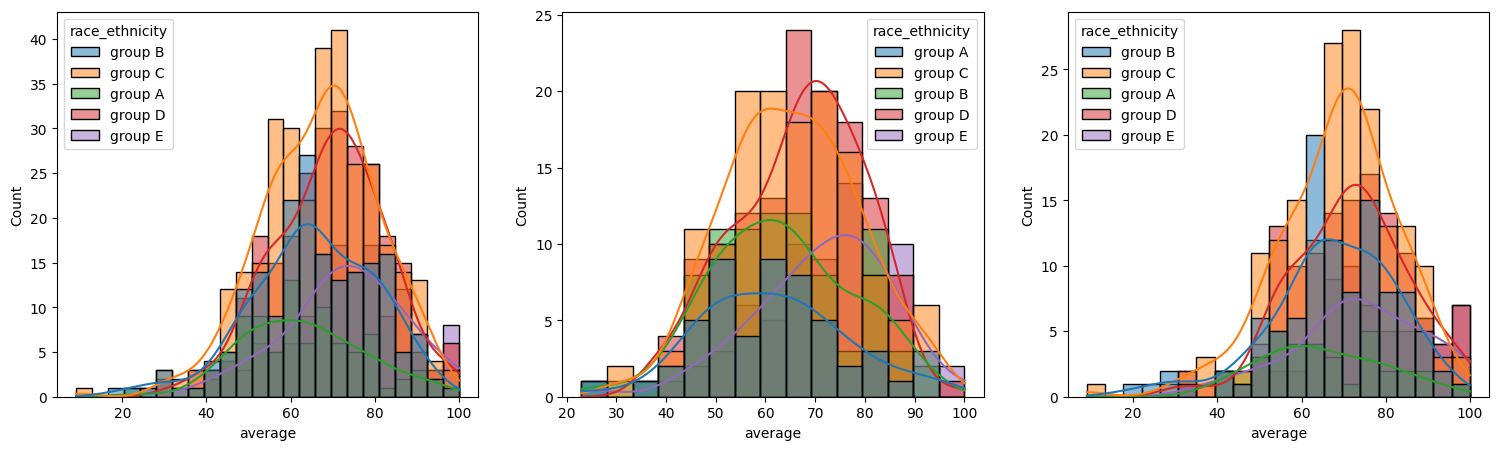

In [99]:
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()


In [100]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## maximum score of students in all three subjects

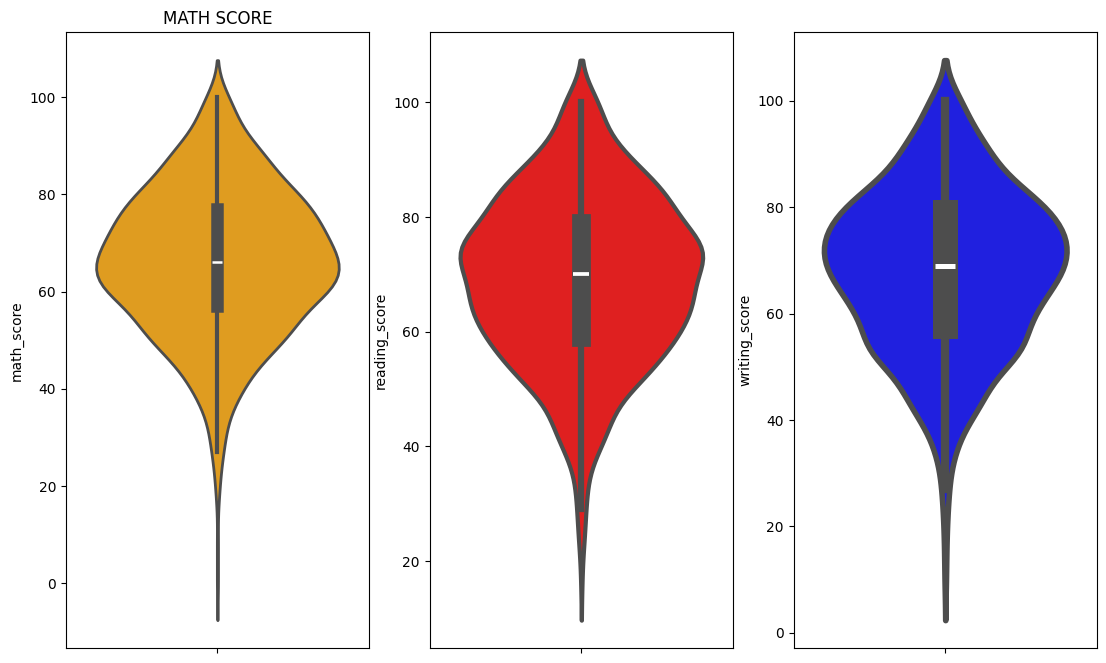

In [102]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MATH SCORE")
sns.violinplot(y='math_score',data=df,color='orange',linewidth=2)
plt.subplot(1,4,2)
sns.violinplot(y='reading_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,3)
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=4)
plt.show()

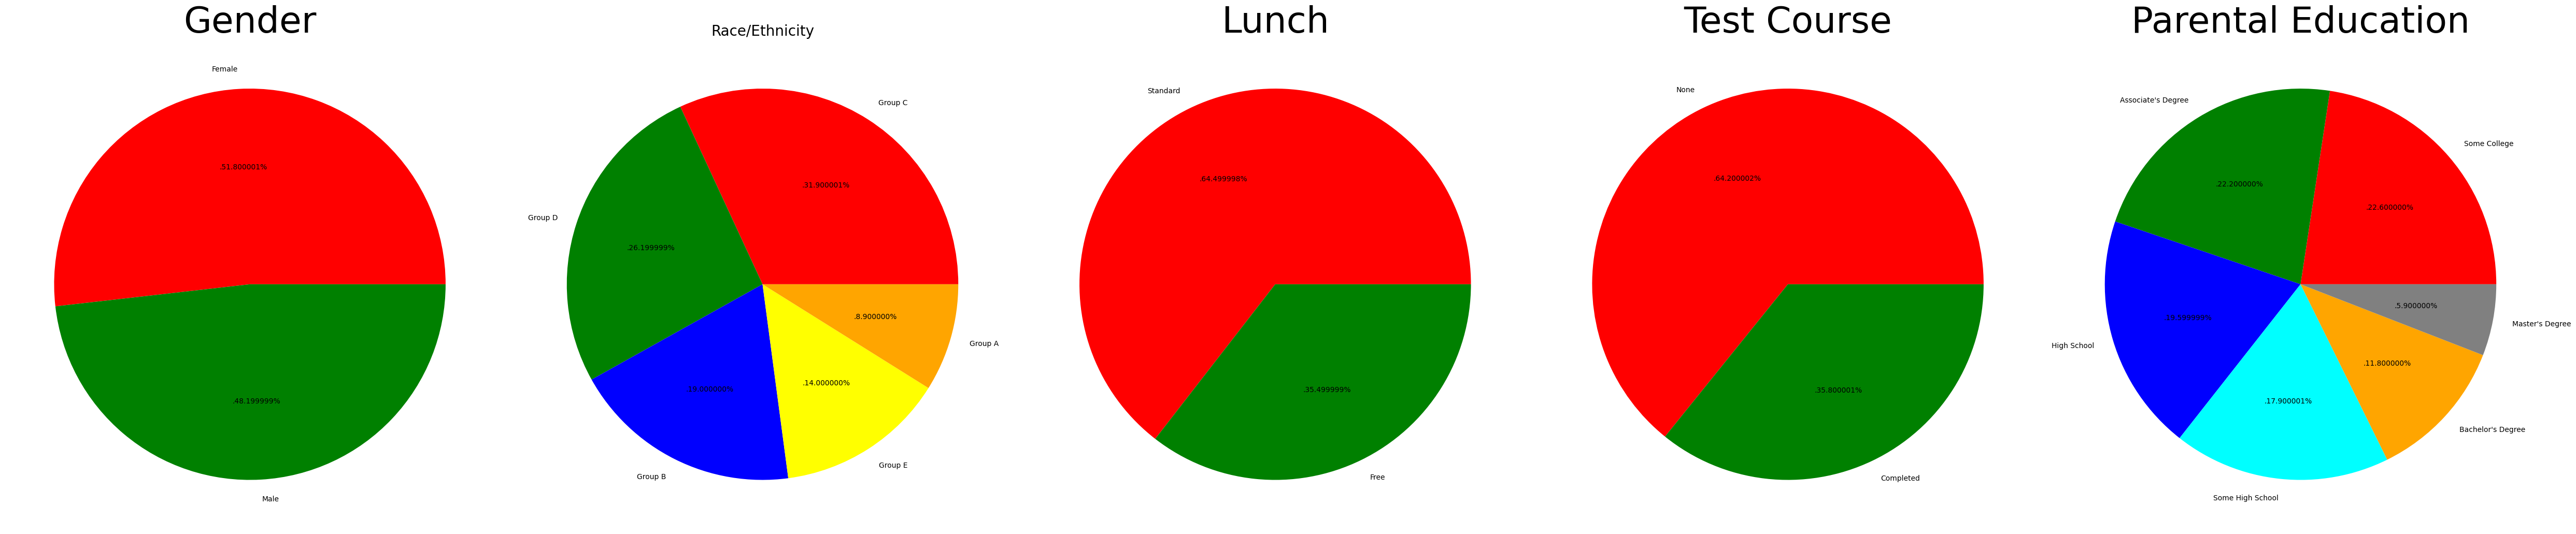

In [112]:
plt.rcParams['figure.figsize'] = (50, 20)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize =50)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'yellow','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 50)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 50)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 50)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [106]:
size = df['gender'].value_counts()

In [107]:
size

gender
female    518
male      482
Name: count, dtype: int64